In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from exnn import ExNN

def data_generator1(datanum, testnum=10000, noise_sigma=1, rand_seed=0):
    
    corr = 0.5
    np.random.seed(rand_seed)
    proj_matrix = np.zeros((10, 4))
    proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
    proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
    proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
    proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])
    u = np.random.uniform(-1, 1, [datanum + testnum, 1])
    t = np.sqrt(corr / (1 - corr))
    x = np.zeros((datanum + testnum, 10))
    for i in range(10):
        x[:, i:i + 1] = (np.random.uniform(-1, 1, [datanum + testnum, 1]) + t * u) / (1 + t)

    y = np.reshape(2 * np.dot(x, proj_matrix[:, 0]) + 0.2 * np.exp(-4 * np.dot(x, proj_matrix[:, 1])) + \
                   3 * (np.dot(x, proj_matrix[:, 2]))**2 + 2.5 * np.sin(np.pi * np.dot(x, proj_matrix[:, 3])), [-1, 1]) + \
              noise_sigma * np.random.normal(0, 1, [datanum + testnum, 1])
    
    task_type = "Regression"
    meta_info = {"X1":{"type":"continuous"},
             "X2":{"type":"continuous"},
             "X3":{"type":"continuous"},
             "X4":{"type":"continuous"},
             "X5":{"type":"continuous"},
             "X6":{"type":"continuous"},
             "X7":{"type":"continuous"},
             "X8":{"type":"continuous"},
             "X9":{"type":"continuous"},
             "X10":{"type":"continuous"},
             "Y":{"type":"target"}}
    for i, (key, item) in enumerate(meta_info.items()):
        if item['type'] == "target":
            sy = MinMaxScaler((-1, 1))
            y = sy.fit_transform(y)
            meta_info[key]["scaler"] = sy
        elif item['type'] == "categorical":
            enc = OrdinalEncoder()
            enc.fit(x[:,[i]])
            ordinal_feature = enc.transform(x[:,[i]])
            x[:,[i]] = ordinal_feature
            meta_info[key]["values"] = enc.categories_[0].tolist()
        else:
            sx = MinMaxScaler((-1, 1))
            x[:,[i]] = sx.fit_transform(x[:,[i]])
            meta_info[key]["scaler"] = sx

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=testnum, random_state=rand_seed)
    return train_x, test_x, train_y, test_y, task_type, meta_info

train_x, test_x, train_y, test_y, task_type, meta_info = data_generator1(datanum=10000, testnum=10000, noise_sigma=1, rand_seed=0)
model = ExNN(meta_info=meta_info,
               subnet_num=10,
               subnet_arch=[10, 6],
               task_type=task_type,
               activation_func=tf.tanh,
               batch_size=min(1000, int(train_x.shape[0] * 0.2)),
               training_epochs=5000,
               lr_bp=0.001,
               lr_cl=0.1,
               beta_threshold=0.05,
               tuning_epochs=100,
               l1_proj=0.0001,
               l1_subnet=0.00316,
               l2_smooth=10**(-6),
               verbose=True,
               val_ratio=0.2,
               early_stop_thres=500)

model.fit(train_x, train_y)

Initial training.
Training epoch: 1, train loss: 0.15248, val loss: 0.15325
Training epoch: 2, train loss: 0.13367, val loss: 0.13557
Training epoch: 3, train loss: 0.11582, val loss: 0.11764
Training epoch: 4, train loss: 0.09918, val loss: 0.10050
Training epoch: 5, train loss: 0.08543, val loss: 0.08640
Training epoch: 6, train loss: 0.07818, val loss: 0.07827
Training epoch: 7, train loss: 0.06875, val loss: 0.06865
Training epoch: 8, train loss: 0.06563, val loss: 0.06523
Training epoch: 9, train loss: 0.05757, val loss: 0.05775
Training epoch: 10, train loss: 0.05770, val loss: 0.05791
Training epoch: 11, train loss: 0.04955, val loss: 0.05008
Training epoch: 12, train loss: 0.04903, val loss: 0.04945
Training epoch: 13, train loss: 0.04844, val loss: 0.04874
Training epoch: 14, train loss: 0.04466, val loss: 0.04488
Training epoch: 15, train loss: 0.04277, val loss: 0.04296
Training epoch: 16, train loss: 0.03933, val loss: 0.03972
Training epoch: 17, train loss: 0.04030, val lo

Training epoch: 140, train loss: 0.02012, val loss: 0.02056
Training epoch: 141, train loss: 0.02019, val loss: 0.02076
Training epoch: 142, train loss: 0.01987, val loss: 0.02043
Training epoch: 143, train loss: 0.01997, val loss: 0.02046
Training epoch: 144, train loss: 0.01988, val loss: 0.02035
Training epoch: 145, train loss: 0.01988, val loss: 0.02046
Training epoch: 146, train loss: 0.01991, val loss: 0.02040
Training epoch: 147, train loss: 0.01995, val loss: 0.02058
Training epoch: 148, train loss: 0.02026, val loss: 0.02087
Training epoch: 149, train loss: 0.01972, val loss: 0.02024
Training epoch: 150, train loss: 0.02097, val loss: 0.02165
Training epoch: 151, train loss: 0.01993, val loss: 0.02054
Training epoch: 152, train loss: 0.02037, val loss: 0.02087
Training epoch: 153, train loss: 0.01970, val loss: 0.02024
Training epoch: 154, train loss: 0.02011, val loss: 0.02082
Training epoch: 155, train loss: 0.01970, val loss: 0.02024
Training epoch: 156, train loss: 0.01988

Training epoch: 279, train loss: 0.01776, val loss: 0.01848
Training epoch: 280, train loss: 0.01773, val loss: 0.01839
Training epoch: 281, train loss: 0.01813, val loss: 0.01881
Training epoch: 282, train loss: 0.01782, val loss: 0.01853
Training epoch: 283, train loss: 0.01800, val loss: 0.01867
Training epoch: 284, train loss: 0.01795, val loss: 0.01855
Training epoch: 285, train loss: 0.01767, val loss: 0.01831
Training epoch: 286, train loss: 0.01791, val loss: 0.01875
Training epoch: 287, train loss: 0.01810, val loss: 0.01886
Training epoch: 288, train loss: 0.01813, val loss: 0.01887
Training epoch: 289, train loss: 0.01770, val loss: 0.01835
Training epoch: 290, train loss: 0.01797, val loss: 0.01858
Training epoch: 291, train loss: 0.01809, val loss: 0.01890
Training epoch: 292, train loss: 0.01807, val loss: 0.01889
Training epoch: 293, train loss: 0.01761, val loss: 0.01832
Training epoch: 294, train loss: 0.01783, val loss: 0.01867
Training epoch: 295, train loss: 0.01821

Training epoch: 418, train loss: 0.01654, val loss: 0.01716
Training epoch: 419, train loss: 0.01676, val loss: 0.01737
Training epoch: 420, train loss: 0.01824, val loss: 0.01884
Training epoch: 421, train loss: 0.01682, val loss: 0.01748
Training epoch: 422, train loss: 0.01670, val loss: 0.01739
Training epoch: 423, train loss: 0.01684, val loss: 0.01747
Training epoch: 424, train loss: 0.01662, val loss: 0.01727
Training epoch: 425, train loss: 0.01688, val loss: 0.01757
Training epoch: 426, train loss: 0.01641, val loss: 0.01703
Training epoch: 427, train loss: 0.01650, val loss: 0.01716
Training epoch: 428, train loss: 0.01677, val loss: 0.01744
Training epoch: 429, train loss: 0.01677, val loss: 0.01750
Training epoch: 430, train loss: 0.01828, val loss: 0.01911
Training epoch: 431, train loss: 0.01657, val loss: 0.01719
Training epoch: 432, train loss: 0.01645, val loss: 0.01707
Training epoch: 433, train loss: 0.01660, val loss: 0.01726
Training epoch: 434, train loss: 0.01664

Training epoch: 556, train loss: 0.01623, val loss: 0.01681
Training epoch: 557, train loss: 0.01632, val loss: 0.01702
Training epoch: 558, train loss: 0.01607, val loss: 0.01668
Training epoch: 559, train loss: 0.01639, val loss: 0.01693
Training epoch: 560, train loss: 0.01638, val loss: 0.01702
Training epoch: 561, train loss: 0.01661, val loss: 0.01731
Training epoch: 562, train loss: 0.01613, val loss: 0.01679
Training epoch: 563, train loss: 0.01722, val loss: 0.01802
Training epoch: 564, train loss: 0.01617, val loss: 0.01679
Training epoch: 565, train loss: 0.01674, val loss: 0.01727
Training epoch: 566, train loss: 0.01683, val loss: 0.01751
Training epoch: 567, train loss: 0.01655, val loss: 0.01713
Training epoch: 568, train loss: 0.01641, val loss: 0.01707
Training epoch: 569, train loss: 0.01635, val loss: 0.01706
Training epoch: 570, train loss: 0.01617, val loss: 0.01678
Training epoch: 571, train loss: 0.01610, val loss: 0.01674
Training epoch: 572, train loss: 0.01610

Training epoch: 695, train loss: 0.01604, val loss: 0.01668
Training epoch: 696, train loss: 0.01587, val loss: 0.01653
Training epoch: 697, train loss: 0.01607, val loss: 0.01674
Training epoch: 698, train loss: 0.01602, val loss: 0.01670
Training epoch: 699, train loss: 0.01611, val loss: 0.01679
Training epoch: 700, train loss: 0.01587, val loss: 0.01662
Training epoch: 701, train loss: 0.01594, val loss: 0.01661
Training epoch: 702, train loss: 0.01657, val loss: 0.01719
Training epoch: 703, train loss: 0.01659, val loss: 0.01727
Training epoch: 704, train loss: 0.01616, val loss: 0.01681
Training epoch: 705, train loss: 0.01602, val loss: 0.01670
Training epoch: 706, train loss: 0.01604, val loss: 0.01663
Training epoch: 707, train loss: 0.01624, val loss: 0.01684
Training epoch: 708, train loss: 0.01604, val loss: 0.01670
Training epoch: 709, train loss: 0.01618, val loss: 0.01689
Training epoch: 710, train loss: 0.01597, val loss: 0.01668
Training epoch: 711, train loss: 0.01624

Training epoch: 834, train loss: 0.01561, val loss: 0.01624
Training epoch: 835, train loss: 0.01567, val loss: 0.01634
Training epoch: 836, train loss: 0.01577, val loss: 0.01647
Training epoch: 837, train loss: 0.01588, val loss: 0.01647
Training epoch: 838, train loss: 0.01591, val loss: 0.01655
Training epoch: 839, train loss: 0.01563, val loss: 0.01629
Training epoch: 840, train loss: 0.01587, val loss: 0.01657
Training epoch: 841, train loss: 0.01625, val loss: 0.01692
Training epoch: 842, train loss: 0.01564, val loss: 0.01625
Training epoch: 843, train loss: 0.01563, val loss: 0.01633
Training epoch: 844, train loss: 0.01571, val loss: 0.01638
Training epoch: 845, train loss: 0.01559, val loss: 0.01622
Training epoch: 846, train loss: 0.01565, val loss: 0.01629
Training epoch: 847, train loss: 0.01562, val loss: 0.01629
Training epoch: 848, train loss: 0.01598, val loss: 0.01665
Training epoch: 849, train loss: 0.01614, val loss: 0.01690
Training epoch: 850, train loss: 0.01561

Training epoch: 971, train loss: 0.01554, val loss: 0.01615
Training epoch: 972, train loss: 0.01557, val loss: 0.01618
Training epoch: 973, train loss: 0.01556, val loss: 0.01617
Training epoch: 974, train loss: 0.01550, val loss: 0.01610
Training epoch: 975, train loss: 0.01617, val loss: 0.01674
Training epoch: 976, train loss: 0.01589, val loss: 0.01648
Training epoch: 977, train loss: 0.01592, val loss: 0.01653
Training epoch: 978, train loss: 0.01581, val loss: 0.01646
Training epoch: 979, train loss: 0.01537, val loss: 0.01599
Training epoch: 980, train loss: 0.01560, val loss: 0.01623
Training epoch: 981, train loss: 0.01664, val loss: 0.01729
Training epoch: 982, train loss: 0.01558, val loss: 0.01615
Training epoch: 983, train loss: 0.01572, val loss: 0.01630
Training epoch: 984, train loss: 0.01583, val loss: 0.01640
Training epoch: 985, train loss: 0.01574, val loss: 0.01635
Training epoch: 986, train loss: 0.01544, val loss: 0.01608
Training epoch: 987, train loss: 0.01576

Training epoch: 1108, train loss: 0.01550, val loss: 0.01608
Training epoch: 1109, train loss: 0.01575, val loss: 0.01630
Training epoch: 1110, train loss: 0.01558, val loss: 0.01616
Training epoch: 1111, train loss: 0.01532, val loss: 0.01589
Training epoch: 1112, train loss: 0.01539, val loss: 0.01596
Training epoch: 1113, train loss: 0.01568, val loss: 0.01627
Training epoch: 1114, train loss: 0.01537, val loss: 0.01590
Training epoch: 1115, train loss: 0.01558, val loss: 0.01615
Training epoch: 1116, train loss: 0.01547, val loss: 0.01605
Training epoch: 1117, train loss: 0.01552, val loss: 0.01605
Training epoch: 1118, train loss: 0.01544, val loss: 0.01600
Training epoch: 1119, train loss: 0.01552, val loss: 0.01610
Training epoch: 1120, train loss: 0.01534, val loss: 0.01591
Training epoch: 1121, train loss: 0.01533, val loss: 0.01588
Training epoch: 1122, train loss: 0.01547, val loss: 0.01602
Training epoch: 1123, train loss: 0.01526, val loss: 0.01582
Training epoch: 1124, tr

Training epoch: 1243, train loss: 0.01532, val loss: 0.01581
Training epoch: 1244, train loss: 0.01543, val loss: 0.01600
Training epoch: 1245, train loss: 0.01559, val loss: 0.01613
Training epoch: 1246, train loss: 0.01559, val loss: 0.01609
Training epoch: 1247, train loss: 0.01618, val loss: 0.01665
Training epoch: 1248, train loss: 0.01541, val loss: 0.01593
Training epoch: 1249, train loss: 0.01550, val loss: 0.01608
Training epoch: 1250, train loss: 0.01539, val loss: 0.01590
Training epoch: 1251, train loss: 0.01533, val loss: 0.01585
Training epoch: 1252, train loss: 0.01562, val loss: 0.01614
Training epoch: 1253, train loss: 0.01524, val loss: 0.01574
Training epoch: 1254, train loss: 0.01553, val loss: 0.01601
Training epoch: 1255, train loss: 0.01529, val loss: 0.01579
Training epoch: 1256, train loss: 0.01534, val loss: 0.01588
Training epoch: 1257, train loss: 0.01532, val loss: 0.01581
Training epoch: 1258, train loss: 0.01528, val loss: 0.01578
Training epoch: 1259, tr

Training epoch: 1379, train loss: 0.01559, val loss: 0.01610
Training epoch: 1380, train loss: 0.01547, val loss: 0.01596
Training epoch: 1381, train loss: 0.01526, val loss: 0.01574
Training epoch: 1382, train loss: 0.01528, val loss: 0.01578
Training epoch: 1383, train loss: 0.01556, val loss: 0.01605
Training epoch: 1384, train loss: 0.01543, val loss: 0.01592
Training epoch: 1385, train loss: 0.01563, val loss: 0.01614
Training epoch: 1386, train loss: 0.01543, val loss: 0.01592
Training epoch: 1387, train loss: 0.01533, val loss: 0.01580
Training epoch: 1388, train loss: 0.01534, val loss: 0.01583
Training epoch: 1389, train loss: 0.01525, val loss: 0.01575
Training epoch: 1390, train loss: 0.01562, val loss: 0.01612
Training epoch: 1391, train loss: 0.01537, val loss: 0.01586
Training epoch: 1392, train loss: 0.01547, val loss: 0.01599
Training epoch: 1393, train loss: 0.01569, val loss: 0.01618
Training epoch: 1394, train loss: 0.01536, val loss: 0.01585
Training epoch: 1395, tr

Training epoch: 1515, train loss: 0.01573, val loss: 0.01619
Training epoch: 1516, train loss: 0.01534, val loss: 0.01583
Training epoch: 1517, train loss: 0.01527, val loss: 0.01573
Training epoch: 1518, train loss: 0.01552, val loss: 0.01602
Training epoch: 1519, train loss: 0.01537, val loss: 0.01586
Training epoch: 1520, train loss: 0.01564, val loss: 0.01611
Training epoch: 1521, train loss: 0.01537, val loss: 0.01585
Training epoch: 1522, train loss: 0.01523, val loss: 0.01571
Training epoch: 1523, train loss: 0.01559, val loss: 0.01602
Training epoch: 1524, train loss: 0.01528, val loss: 0.01574
Training epoch: 1525, train loss: 0.01594, val loss: 0.01644
Training epoch: 1526, train loss: 0.01524, val loss: 0.01570
Training epoch: 1527, train loss: 0.01593, val loss: 0.01634
Training epoch: 1528, train loss: 0.01543, val loss: 0.01592
Training epoch: 1529, train loss: 0.01553, val loss: 0.01600
Training epoch: 1530, train loss: 0.01527, val loss: 0.01574
Training epoch: 1531, tr

Training epoch: 1650, train loss: 0.01604, val loss: 0.01654
Training epoch: 1651, train loss: 0.01572, val loss: 0.01620
Training epoch: 1652, train loss: 0.01549, val loss: 0.01597
Training epoch: 1653, train loss: 0.01639, val loss: 0.01675
Training epoch: 1654, train loss: 0.01564, val loss: 0.01609
Training epoch: 1655, train loss: 0.01528, val loss: 0.01575
Training epoch: 1656, train loss: 0.01553, val loss: 0.01599
Training epoch: 1657, train loss: 0.01537, val loss: 0.01588
Training epoch: 1658, train loss: 0.01537, val loss: 0.01579
Training epoch: 1659, train loss: 0.01538, val loss: 0.01583
Training epoch: 1660, train loss: 0.01527, val loss: 0.01574
Training epoch: 1661, train loss: 0.01533, val loss: 0.01579
Training epoch: 1662, train loss: 0.01534, val loss: 0.01579
Training epoch: 1663, train loss: 0.01541, val loss: 0.01587
Training epoch: 1664, train loss: 0.01537, val loss: 0.01581
Training epoch: 1665, train loss: 0.01548, val loss: 0.01595
Training epoch: 1666, tr

Training epoch: 1785, train loss: 0.01609, val loss: 0.01651
Training epoch: 1786, train loss: 0.01549, val loss: 0.01597
Training epoch: 1787, train loss: 0.01572, val loss: 0.01620
Training epoch: 1788, train loss: 0.01549, val loss: 0.01596
Training epoch: 1789, train loss: 0.01535, val loss: 0.01582
Training epoch: 1790, train loss: 0.01575, val loss: 0.01626
Training epoch: 1791, train loss: 0.01557, val loss: 0.01605
Training epoch: 1792, train loss: 0.01530, val loss: 0.01575
Training epoch: 1793, train loss: 0.01536, val loss: 0.01581
Training epoch: 1794, train loss: 0.01553, val loss: 0.01596
Training epoch: 1795, train loss: 0.01537, val loss: 0.01582
Training epoch: 1796, train loss: 0.01557, val loss: 0.01603
Training epoch: 1797, train loss: 0.01535, val loss: 0.01578
Training epoch: 1798, train loss: 0.01553, val loss: 0.01599
Training epoch: 1799, train loss: 0.01635, val loss: 0.01690
Training epoch: 1800, train loss: 0.01582, val loss: 0.01630
Training epoch: 1801, tr

Training epoch: 1922, train loss: 0.01554, val loss: 0.01595
Training epoch: 1923, train loss: 0.01522, val loss: 0.01564
Training epoch: 1924, train loss: 0.01555, val loss: 0.01598
Training epoch: 1925, train loss: 0.01550, val loss: 0.01598
Training epoch: 1926, train loss: 0.01541, val loss: 0.01586
Training epoch: 1927, train loss: 0.01561, val loss: 0.01606
Training epoch: 1928, train loss: 0.01570, val loss: 0.01616
Training epoch: 1929, train loss: 0.01624, val loss: 0.01670
Training epoch: 1930, train loss: 0.01553, val loss: 0.01599
Training epoch: 1931, train loss: 0.01574, val loss: 0.01618
Training epoch: 1932, train loss: 0.01619, val loss: 0.01669
Training epoch: 1933, train loss: 0.01562, val loss: 0.01609
Training epoch: 1934, train loss: 0.01583, val loss: 0.01628
Training epoch: 1935, train loss: 0.01598, val loss: 0.01640
Training epoch: 1936, train loss: 0.01530, val loss: 0.01574
Training epoch: 1937, train loss: 0.01538, val loss: 0.01580
Training epoch: 1938, tr

Training epoch: 2057, train loss: 0.01526, val loss: 0.01567
Training epoch: 2058, train loss: 0.01541, val loss: 0.01583
Training epoch: 2059, train loss: 0.01591, val loss: 0.01636
Training epoch: 2060, train loss: 0.01597, val loss: 0.01634
Training epoch: 2061, train loss: 0.01549, val loss: 0.01590
Training epoch: 2062, train loss: 0.01529, val loss: 0.01570
Training epoch: 2063, train loss: 0.01541, val loss: 0.01584
Training epoch: 2064, train loss: 0.01557, val loss: 0.01598
Training epoch: 2065, train loss: 0.01554, val loss: 0.01593
Training epoch: 2066, train loss: 0.01525, val loss: 0.01565
Training epoch: 2067, train loss: 0.01534, val loss: 0.01572
Training epoch: 2068, train loss: 0.01555, val loss: 0.01594
Training epoch: 2069, train loss: 0.01532, val loss: 0.01575
Training epoch: 2070, train loss: 0.01547, val loss: 0.01588
Training epoch: 2071, train loss: 0.01549, val loss: 0.01589
Training epoch: 2072, train loss: 0.01525, val loss: 0.01567
Training epoch: 2073, tr

Training epoch: 2192, train loss: 0.01543, val loss: 0.01577
Training epoch: 2193, train loss: 0.01566, val loss: 0.01606
Training epoch: 2194, train loss: 0.01523, val loss: 0.01561
Training epoch: 2195, train loss: 0.01578, val loss: 0.01623
Training epoch: 2196, train loss: 0.01537, val loss: 0.01573
Training epoch: 2197, train loss: 0.01551, val loss: 0.01590
Training epoch: 2198, train loss: 0.01528, val loss: 0.01569
Training epoch: 2199, train loss: 0.01541, val loss: 0.01583
Training epoch: 2200, train loss: 0.01549, val loss: 0.01586
Training epoch: 2201, train loss: 0.01533, val loss: 0.01571
Training epoch: 2202, train loss: 0.01535, val loss: 0.01572
Training epoch: 2203, train loss: 0.01526, val loss: 0.01564
Training epoch: 2204, train loss: 0.01545, val loss: 0.01581
Training epoch: 2205, train loss: 0.01544, val loss: 0.01584
Training epoch: 2206, train loss: 0.01581, val loss: 0.01625
Training epoch: 2207, train loss: 0.01565, val loss: 0.01604
Training epoch: 2208, tr

Training epoch: 2329, train loss: 0.01553, val loss: 0.01592
Training epoch: 2330, train loss: 0.01522, val loss: 0.01562
Training epoch: 2331, train loss: 0.01530, val loss: 0.01572
Training epoch: 2332, train loss: 0.01608, val loss: 0.01650
Training epoch: 2333, train loss: 0.01561, val loss: 0.01601
Training epoch: 2334, train loss: 0.01566, val loss: 0.01602
Training epoch: 2335, train loss: 0.01567, val loss: 0.01603
Training epoch: 2336, train loss: 0.01554, val loss: 0.01588
Training epoch: 2337, train loss: 0.01548, val loss: 0.01590
Training epoch: 2338, train loss: 0.01556, val loss: 0.01592
Training epoch: 2339, train loss: 0.01532, val loss: 0.01569
Training epoch: 2340, train loss: 0.01579, val loss: 0.01616
Training epoch: 2341, train loss: 0.01574, val loss: 0.01611
Training epoch: 2342, train loss: 0.01566, val loss: 0.01604
Training epoch: 2343, train loss: 0.01550, val loss: 0.01590
Training epoch: 2344, train loss: 0.01522, val loss: 0.01562
Training epoch: 2345, tr

Training epoch: 2466, train loss: 0.01545, val loss: 0.01582
Training epoch: 2467, train loss: 0.01527, val loss: 0.01565
Training epoch: 2468, train loss: 0.01558, val loss: 0.01598
Training epoch: 2469, train loss: 0.01526, val loss: 0.01565
Training epoch: 2470, train loss: 0.01544, val loss: 0.01583
Training epoch: 2471, train loss: 0.01588, val loss: 0.01628
Training epoch: 2472, train loss: 0.01539, val loss: 0.01575
Training epoch: 2473, train loss: 0.01573, val loss: 0.01610
Training epoch: 2474, train loss: 0.01526, val loss: 0.01566
Training epoch: 2475, train loss: 0.01533, val loss: 0.01572
Training epoch: 2476, train loss: 0.01543, val loss: 0.01580
Training epoch: 2477, train loss: 0.01529, val loss: 0.01568
Training epoch: 2478, train loss: 0.01523, val loss: 0.01559
Training epoch: 2479, train loss: 0.01528, val loss: 0.01570
Training epoch: 2480, train loss: 0.01548, val loss: 0.01582
Training epoch: 2481, train loss: 0.01543, val loss: 0.01581
Training epoch: 2482, tr

Training epoch: 2602, train loss: 0.01631, val loss: 0.01665
Training epoch: 2603, train loss: 0.01535, val loss: 0.01577
Training epoch: 2604, train loss: 0.01544, val loss: 0.01585
Training epoch: 2605, train loss: 0.01580, val loss: 0.01619
Training epoch: 2606, train loss: 0.01525, val loss: 0.01562
Training epoch: 2607, train loss: 0.01535, val loss: 0.01575
Training epoch: 2608, train loss: 0.01550, val loss: 0.01584
Training epoch: 2609, train loss: 0.01540, val loss: 0.01580
Training epoch: 2610, train loss: 0.01556, val loss: 0.01595
Training epoch: 2611, train loss: 0.01542, val loss: 0.01580
Training epoch: 2612, train loss: 0.01546, val loss: 0.01586
Training epoch: 2613, train loss: 0.01529, val loss: 0.01568
Training epoch: 2614, train loss: 0.01530, val loss: 0.01566
Training epoch: 2615, train loss: 0.01539, val loss: 0.01577
Training epoch: 2616, train loss: 0.01543, val loss: 0.01582
Training epoch: 2617, train loss: 0.01567, val loss: 0.01604
Training epoch: 2618, tr

Training epoch: 2739, train loss: 0.01537, val loss: 0.01572
Training epoch: 2740, train loss: 0.01546, val loss: 0.01582
Training epoch: 2741, train loss: 0.01523, val loss: 0.01561
Training epoch: 2742, train loss: 0.01566, val loss: 0.01605
Training epoch: 2743, train loss: 0.01552, val loss: 0.01596
Training epoch: 2744, train loss: 0.01546, val loss: 0.01584
Training epoch: 2745, train loss: 0.01597, val loss: 0.01634
Training epoch: 2746, train loss: 0.01553, val loss: 0.01595
Training epoch: 2747, train loss: 0.01536, val loss: 0.01574
Training epoch: 2748, train loss: 0.01545, val loss: 0.01584
Training epoch: 2749, train loss: 0.01528, val loss: 0.01567
Training epoch: 2750, train loss: 0.01547, val loss: 0.01587
Training epoch: 2751, train loss: 0.01529, val loss: 0.01564
Training epoch: 2752, train loss: 0.01542, val loss: 0.01581
Training epoch: 2753, train loss: 0.01535, val loss: 0.01574
Training epoch: 2754, train loss: 0.01522, val loss: 0.01561
Training epoch: 2755, tr

Training epoch: 2877, train loss: 0.01545, val loss: 0.01582
Training epoch: 2878, train loss: 0.01531, val loss: 0.01568
Training epoch: 2879, train loss: 0.01530, val loss: 0.01574
Training epoch: 2880, train loss: 0.01526, val loss: 0.01567
Training epoch: 2881, train loss: 0.01544, val loss: 0.01579
Training epoch: 2882, train loss: 0.01572, val loss: 0.01611
Training epoch: 2883, train loss: 0.01523, val loss: 0.01563
Training epoch: 2884, train loss: 0.01536, val loss: 0.01571
Training epoch: 2885, train loss: 0.01525, val loss: 0.01566
Training epoch: 2886, train loss: 0.01542, val loss: 0.01576
Training epoch: 2887, train loss: 0.01544, val loss: 0.01581
Training epoch: 2888, train loss: 0.01544, val loss: 0.01586
Training epoch: 2889, train loss: 0.01567, val loss: 0.01608
Training epoch: 2890, train loss: 0.01530, val loss: 0.01568
Training epoch: 2891, train loss: 0.01523, val loss: 0.01562
Training epoch: 2892, train loss: 0.01545, val loss: 0.01586
Training epoch: 2893, tr

Training epoch: 3015, train loss: 0.01575, val loss: 0.01610
Training epoch: 3016, train loss: 0.01535, val loss: 0.01570
Training epoch: 3017, train loss: 0.01545, val loss: 0.01585
Training epoch: 3018, train loss: 0.01553, val loss: 0.01592
Training epoch: 3019, train loss: 0.01527, val loss: 0.01566
Training epoch: 3020, train loss: 0.01609, val loss: 0.01649
Training epoch: 3021, train loss: 0.01577, val loss: 0.01616
Training epoch: 3022, train loss: 0.01547, val loss: 0.01585
Training epoch: 3023, train loss: 0.01527, val loss: 0.01566
Training epoch: 3024, train loss: 0.01534, val loss: 0.01572
Training epoch: 3025, train loss: 0.01549, val loss: 0.01589
Training epoch: 3026, train loss: 0.01530, val loss: 0.01570
Training epoch: 3027, train loss: 0.01591, val loss: 0.01634
Training epoch: 3028, train loss: 0.01532, val loss: 0.01569
Training epoch: 3029, train loss: 0.01549, val loss: 0.01587
Training epoch: 3030, train loss: 0.01559, val loss: 0.01594
Training epoch: 3031, tr

Training epoch: 3151, train loss: 0.01528, val loss: 0.01565
Training epoch: 3152, train loss: 0.01568, val loss: 0.01607
Training epoch: 3153, train loss: 0.01538, val loss: 0.01579
Training epoch: 3154, train loss: 0.01557, val loss: 0.01592
Training epoch: 3155, train loss: 0.01537, val loss: 0.01574
Training epoch: 3156, train loss: 0.01523, val loss: 0.01561
Training epoch: 3157, train loss: 0.01548, val loss: 0.01587
Training epoch: 3158, train loss: 0.01552, val loss: 0.01592
Training epoch: 3159, train loss: 0.01553, val loss: 0.01592
Training epoch: 3160, train loss: 0.01570, val loss: 0.01615
Training epoch: 3161, train loss: 0.01548, val loss: 0.01586
Training epoch: 3162, train loss: 0.01541, val loss: 0.01580
Training epoch: 3163, train loss: 0.01546, val loss: 0.01585
Training epoch: 3164, train loss: 0.01535, val loss: 0.01575
Training epoch: 3165, train loss: 0.01542, val loss: 0.01581
Training epoch: 3166, train loss: 0.01537, val loss: 0.01571
Training epoch: 3167, tr

Training epoch: 3289, train loss: 0.01548, val loss: 0.01587
Training epoch: 3290, train loss: 0.01564, val loss: 0.01601
Training epoch: 3291, train loss: 0.01523, val loss: 0.01560
Training epoch: 3292, train loss: 0.01529, val loss: 0.01568
Training epoch: 3293, train loss: 0.01556, val loss: 0.01598
Training epoch: 3294, train loss: 0.01599, val loss: 0.01636
Training epoch: 3295, train loss: 0.01594, val loss: 0.01634
Training epoch: 3296, train loss: 0.01560, val loss: 0.01603
Training epoch: 3297, train loss: 0.01572, val loss: 0.01613
Training epoch: 3298, train loss: 0.01567, val loss: 0.01605
Training epoch: 3299, train loss: 0.01570, val loss: 0.01612
Training epoch: 3300, train loss: 0.01526, val loss: 0.01561
Training epoch: 3301, train loss: 0.01532, val loss: 0.01565
Training epoch: 3302, train loss: 0.01547, val loss: 0.01588
Training epoch: 3303, train loss: 0.01558, val loss: 0.01593
Training epoch: 3304, train loss: 0.01526, val loss: 0.01561
Training epoch: 3305, tr

Training epoch: 3426, train loss: 0.01531, val loss: 0.01572
Training epoch: 3427, train loss: 0.01531, val loss: 0.01570
Training epoch: 3428, train loss: 0.01528, val loss: 0.01566
Training epoch: 3429, train loss: 0.01551, val loss: 0.01589
Training epoch: 3430, train loss: 0.01538, val loss: 0.01576
Training epoch: 3431, train loss: 0.01536, val loss: 0.01576
Training epoch: 3432, train loss: 0.01526, val loss: 0.01564
Training epoch: 3433, train loss: 0.01543, val loss: 0.01582
Training epoch: 3434, train loss: 0.01535, val loss: 0.01573
Training epoch: 3435, train loss: 0.01533, val loss: 0.01571
Training epoch: 3436, train loss: 0.01557, val loss: 0.01594
Training epoch: 3437, train loss: 0.01538, val loss: 0.01578
Training epoch: 3438, train loss: 0.01525, val loss: 0.01559
Training epoch: 3439, train loss: 0.01535, val loss: 0.01571
Training epoch: 3440, train loss: 0.01529, val loss: 0.01565
Training epoch: 3441, train loss: 0.01550, val loss: 0.01588
Training epoch: 3442, tr

Training epoch: 3564, train loss: 0.01522, val loss: 0.01563
Training epoch: 3565, train loss: 0.01555, val loss: 0.01589
Training epoch: 3566, train loss: 0.01582, val loss: 0.01621
Training epoch: 3567, train loss: 0.01530, val loss: 0.01567
Training epoch: 3568, train loss: 0.01549, val loss: 0.01590
Training epoch: 3569, train loss: 0.01539, val loss: 0.01574
Training epoch: 3570, train loss: 0.01531, val loss: 0.01570
Training epoch: 3571, train loss: 0.01535, val loss: 0.01572
Training epoch: 3572, train loss: 0.01557, val loss: 0.01589
Training epoch: 3573, train loss: 0.01548, val loss: 0.01585
Training epoch: 3574, train loss: 0.01530, val loss: 0.01567
Training epoch: 3575, train loss: 0.01566, val loss: 0.01600
Training epoch: 3576, train loss: 0.01561, val loss: 0.01595
Training epoch: 3577, train loss: 0.01525, val loss: 0.01562
Training epoch: 3578, train loss: 0.01546, val loss: 0.01587
Training epoch: 3579, train loss: 0.01539, val loss: 0.01574
Training epoch: 3580, tr

Training epoch: 3701, train loss: 0.01544, val loss: 0.01584
Training epoch: 3702, train loss: 0.01561, val loss: 0.01600
Training epoch: 3703, train loss: 0.01546, val loss: 0.01585
Training epoch: 3704, train loss: 0.01579, val loss: 0.01617
Training epoch: 3705, train loss: 0.01547, val loss: 0.01582
Training epoch: 3706, train loss: 0.01537, val loss: 0.01576
Training epoch: 3707, train loss: 0.01546, val loss: 0.01584
Training epoch: 3708, train loss: 0.01530, val loss: 0.01569
Training epoch: 3709, train loss: 0.01531, val loss: 0.01566
Training epoch: 3710, train loss: 0.01522, val loss: 0.01560
Training epoch: 3711, train loss: 0.01534, val loss: 0.01573
Training epoch: 3712, train loss: 0.01589, val loss: 0.01626
Training epoch: 3713, train loss: 0.01592, val loss: 0.01632
Training epoch: 3714, train loss: 0.01545, val loss: 0.01584
Training epoch: 3715, train loss: 0.01538, val loss: 0.01577
Training epoch: 3716, train loss: 0.01601, val loss: 0.01640
Training epoch: 3717, tr

Training epoch: 3837, train loss: 0.01549, val loss: 0.01585
Training epoch: 3838, train loss: 0.01529, val loss: 0.01565
Training epoch: 3839, train loss: 0.01578, val loss: 0.01609
Training epoch: 3840, train loss: 0.01542, val loss: 0.01581
Training epoch: 3841, train loss: 0.01536, val loss: 0.01573
Training epoch: 3842, train loss: 0.01585, val loss: 0.01623
Training epoch: 3843, train loss: 0.01534, val loss: 0.01570
Training epoch: 3844, train loss: 0.01555, val loss: 0.01596
Training epoch: 3845, train loss: 0.01533, val loss: 0.01566
Training epoch: 3846, train loss: 0.01550, val loss: 0.01587
Training epoch: 3847, train loss: 0.01528, val loss: 0.01567
Training epoch: 3848, train loss: 0.01538, val loss: 0.01572
Training epoch: 3849, train loss: 0.01527, val loss: 0.01566
Training epoch: 3850, train loss: 0.01523, val loss: 0.01562
Training epoch: 3851, train loss: 0.01547, val loss: 0.01586
Training epoch: 3852, train loss: 0.01638, val loss: 0.01679
Training epoch: 3853, tr

Training epoch: 3974, train loss: 0.01533, val loss: 0.01567
Training epoch: 3975, train loss: 0.01532, val loss: 0.01570
Training epoch: 3976, train loss: 0.01567, val loss: 0.01605
Training epoch: 3977, train loss: 0.01546, val loss: 0.01578
Training epoch: 3978, train loss: 0.01546, val loss: 0.01579
Training epoch: 3979, train loss: 0.01536, val loss: 0.01571
Training epoch: 3980, train loss: 0.01562, val loss: 0.01597
Training epoch: 3981, train loss: 0.01539, val loss: 0.01578
Training epoch: 3982, train loss: 0.01547, val loss: 0.01581
Training epoch: 3983, train loss: 0.01548, val loss: 0.01584
Training epoch: 3984, train loss: 0.01591, val loss: 0.01627
Training epoch: 3985, train loss: 0.01566, val loss: 0.01604
Training epoch: 3986, train loss: 0.01537, val loss: 0.01572
Training epoch: 3987, train loss: 0.01540, val loss: 0.01581
Training epoch: 3988, train loss: 0.01539, val loss: 0.01574
Training epoch: 3989, train loss: 0.01528, val loss: 0.01565
Training epoch: 3990, tr

Training epoch: 4110, train loss: 0.01533, val loss: 0.01574
Training epoch: 4111, train loss: 0.01550, val loss: 0.01590
Training epoch: 4112, train loss: 0.01560, val loss: 0.01601
Training epoch: 4113, train loss: 0.01538, val loss: 0.01576
Training epoch: 4114, train loss: 0.01541, val loss: 0.01577
Training epoch: 4115, train loss: 0.01523, val loss: 0.01563
Training epoch: 4116, train loss: 0.01596, val loss: 0.01636
Training epoch: 4117, train loss: 0.01536, val loss: 0.01574
Training epoch: 4118, train loss: 0.01526, val loss: 0.01562
Training epoch: 4119, train loss: 0.01536, val loss: 0.01573
Training epoch: 4120, train loss: 0.01526, val loss: 0.01561
Training epoch: 4121, train loss: 0.01524, val loss: 0.01562
Training epoch: 4122, train loss: 0.01533, val loss: 0.01571
Training epoch: 4123, train loss: 0.01540, val loss: 0.01580
Training epoch: 4124, train loss: 0.01524, val loss: 0.01561
Training epoch: 4125, train loss: 0.01547, val loss: 0.01580
Training epoch: 4126, tr

Training epoch: 4248, train loss: 0.01608, val loss: 0.01649
Training epoch: 4249, train loss: 0.01530, val loss: 0.01571
Training epoch: 4250, train loss: 0.01535, val loss: 0.01569
Training epoch: 4251, train loss: 0.01542, val loss: 0.01579
Training epoch: 4252, train loss: 0.01526, val loss: 0.01563
Training epoch: 4253, train loss: 0.01527, val loss: 0.01563
Training epoch: 4254, train loss: 0.01537, val loss: 0.01572
Training epoch: 4255, train loss: 0.01549, val loss: 0.01591
Training epoch: 4256, train loss: 0.01600, val loss: 0.01638
Training epoch: 4257, train loss: 0.01553, val loss: 0.01593
Training epoch: 4258, train loss: 0.01527, val loss: 0.01565
Training epoch: 4259, train loss: 0.01549, val loss: 0.01584
Training epoch: 4260, train loss: 0.01525, val loss: 0.01560
Training epoch: 4261, train loss: 0.01527, val loss: 0.01567
Training epoch: 4262, train loss: 0.01538, val loss: 0.01574
Training epoch: 4263, train loss: 0.01526, val loss: 0.01560
Training epoch: 4264, tr

Training epoch: 4386, train loss: 0.01530, val loss: 0.01566
Training epoch: 4387, train loss: 0.01539, val loss: 0.01577
Training epoch: 4388, train loss: 0.01538, val loss: 0.01576
Training epoch: 4389, train loss: 0.01521, val loss: 0.01561
Training epoch: 4390, train loss: 0.01527, val loss: 0.01566
Training epoch: 4391, train loss: 0.01561, val loss: 0.01601
Training epoch: 4392, train loss: 0.01555, val loss: 0.01586
Training epoch: 4393, train loss: 0.01544, val loss: 0.01582
Training epoch: 4394, train loss: 0.01526, val loss: 0.01561
Training epoch: 4395, train loss: 0.01548, val loss: 0.01586
Training epoch: 4396, train loss: 0.01550, val loss: 0.01586
Training epoch: 4397, train loss: 0.01529, val loss: 0.01564
Training epoch: 4398, train loss: 0.01560, val loss: 0.01597
Training epoch: 4399, train loss: 0.01540, val loss: 0.01577
Training epoch: 4400, train loss: 0.01598, val loss: 0.01633
Training epoch: 4401, train loss: 0.01530, val loss: 0.01568
Training epoch: 4402, tr

Training epoch: 4522, train loss: 0.01541, val loss: 0.01578
Training epoch: 4523, train loss: 0.01545, val loss: 0.01580
Training epoch: 4524, train loss: 0.01548, val loss: 0.01583
Training epoch: 4525, train loss: 0.01568, val loss: 0.01602
Training epoch: 4526, train loss: 0.01541, val loss: 0.01578
Training epoch: 4527, train loss: 0.01521, val loss: 0.01559
Training epoch: 4528, train loss: 0.01557, val loss: 0.01593
Training epoch: 4529, train loss: 0.01526, val loss: 0.01563
Training epoch: 4530, train loss: 0.01531, val loss: 0.01565
Training epoch: 4531, train loss: 0.01526, val loss: 0.01563
Training epoch: 4532, train loss: 0.01552, val loss: 0.01590
Training epoch: 4533, train loss: 0.01554, val loss: 0.01591
Training epoch: 4534, train loss: 0.01555, val loss: 0.01592
Training epoch: 4535, train loss: 0.01540, val loss: 0.01575
Training epoch: 4536, train loss: 0.01538, val loss: 0.01577
Training epoch: 4537, train loss: 0.01528, val loss: 0.01567
Training epoch: 4538, tr

Training epoch: 4657, train loss: 0.01538, val loss: 0.01574
Training epoch: 4658, train loss: 0.01555, val loss: 0.01586
Training epoch: 4659, train loss: 0.01533, val loss: 0.01571
Training epoch: 4660, train loss: 0.01556, val loss: 0.01594
Training epoch: 4661, train loss: 0.01532, val loss: 0.01567
Training epoch: 4662, train loss: 0.01525, val loss: 0.01563
Training epoch: 4663, train loss: 0.01528, val loss: 0.01563
Training epoch: 4664, train loss: 0.01544, val loss: 0.01579
Training epoch: 4665, train loss: 0.01528, val loss: 0.01565
Training epoch: 4666, train loss: 0.01534, val loss: 0.01567
Training epoch: 4667, train loss: 0.01530, val loss: 0.01570
Training epoch: 4668, train loss: 0.01563, val loss: 0.01595
Training epoch: 4669, train loss: 0.01606, val loss: 0.01646
Training epoch: 4670, train loss: 0.01528, val loss: 0.01565
Training epoch: 4671, train loss: 0.01545, val loss: 0.01582
Training epoch: 4672, train loss: 0.01531, val loss: 0.01568
Training epoch: 4673, tr

Training epoch: 4792, train loss: 0.01542, val loss: 0.01579
Training epoch: 4793, train loss: 0.01526, val loss: 0.01564
Training epoch: 4794, train loss: 0.01537, val loss: 0.01574
Training epoch: 4795, train loss: 0.01549, val loss: 0.01588
Training epoch: 4796, train loss: 0.01563, val loss: 0.01601
Training epoch: 4797, train loss: 0.01532, val loss: 0.01568
Training epoch: 4798, train loss: 0.01519, val loss: 0.01555
Training epoch: 4799, train loss: 0.01526, val loss: 0.01564
Training epoch: 4800, train loss: 0.01533, val loss: 0.01569
Training epoch: 4801, train loss: 0.01554, val loss: 0.01593
Training epoch: 4802, train loss: 0.01545, val loss: 0.01583
Training epoch: 4803, train loss: 0.01527, val loss: 0.01565
Training epoch: 4804, train loss: 0.01520, val loss: 0.01558
Training epoch: 4805, train loss: 0.01561, val loss: 0.01598
Training epoch: 4806, train loss: 0.01531, val loss: 0.01571
Training epoch: 4807, train loss: 0.01541, val loss: 0.01577
Training epoch: 4808, tr

Training epoch: 4927, train loss: 0.01532, val loss: 0.01568
Training epoch: 4928, train loss: 0.01574, val loss: 0.01615
Training epoch: 4929, train loss: 0.01540, val loss: 0.01576
Training epoch: 4930, train loss: 0.01532, val loss: 0.01570
Training epoch: 4931, train loss: 0.01582, val loss: 0.01621
Training epoch: 4932, train loss: 0.01527, val loss: 0.01561
Training epoch: 4933, train loss: 0.01528, val loss: 0.01567
Training epoch: 4934, train loss: 0.01552, val loss: 0.01591
Training epoch: 4935, train loss: 0.01529, val loss: 0.01570
Training epoch: 4936, train loss: 0.01546, val loss: 0.01580
Training epoch: 4937, train loss: 0.01557, val loss: 0.01588
Training epoch: 4938, train loss: 0.01549, val loss: 0.01588
Training epoch: 4939, train loss: 0.01522, val loss: 0.01558
Training epoch: 4940, train loss: 0.01525, val loss: 0.01562
Training epoch: 4941, train loss: 0.01558, val loss: 0.01595
Training epoch: 4942, train loss: 0.01535, val loss: 0.01573
Training epoch: 4943, tr

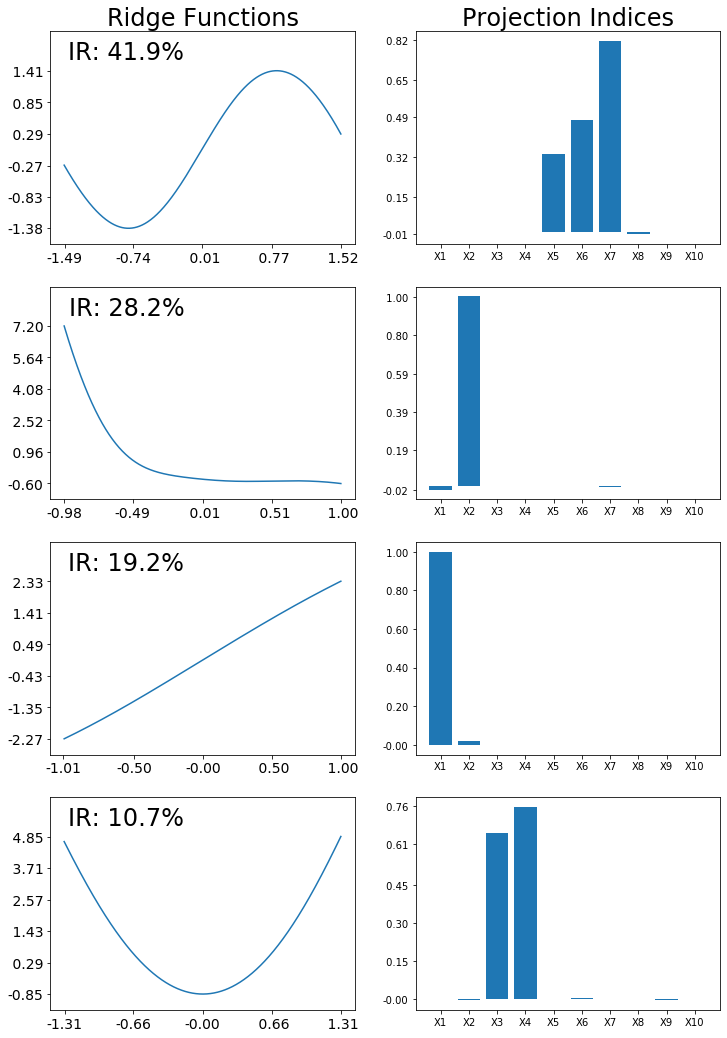

In [2]:
model.visualize(folder="./", name="exnn_demo")

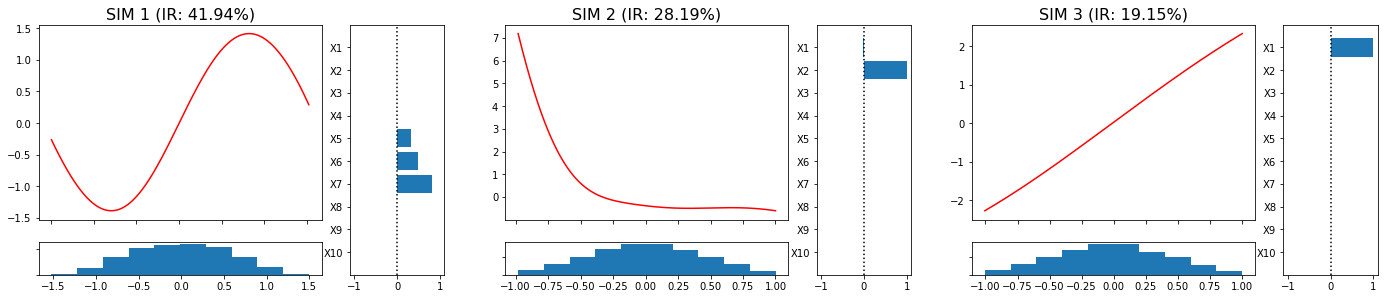

In [3]:
model.visualize_new(cols_per_row=3, subnet_num=3, dummy_subnet_num=0, folder="./", name="exnn_demo")